# Star distribution within galaxy

This diagram shows the estimated number of stars within a given distance from Earth (the Sun), using a three-component galactic density model:

- **Thin disk**: Exponential radial profile with scale length ~3.5 kpc and vertical scale height ~860 pc
- **Central bulge**: Gaussian spheroid with scale radius ~1 kpc, contributing ~15% of total stellar mass
- **Stellar halo**: Power-law profile extending to large radii, containing ~1-2% of stars

The model uses shell-based Monte Carlo integration, sampling stellar density at random points within concentric spherical shells centered on the Sun (located ~27,000 light-years from the galactic center). Key parameters are calibrated against observational data from Gaia, HIPPARCOS, and RECONS surveys, with local stellar density of ~0.12 stars/pc³.

More details here: https://github.com/lookbusy1344/Relativity/blob/main/Javascript/docs/galactic-stellar-density-research.md


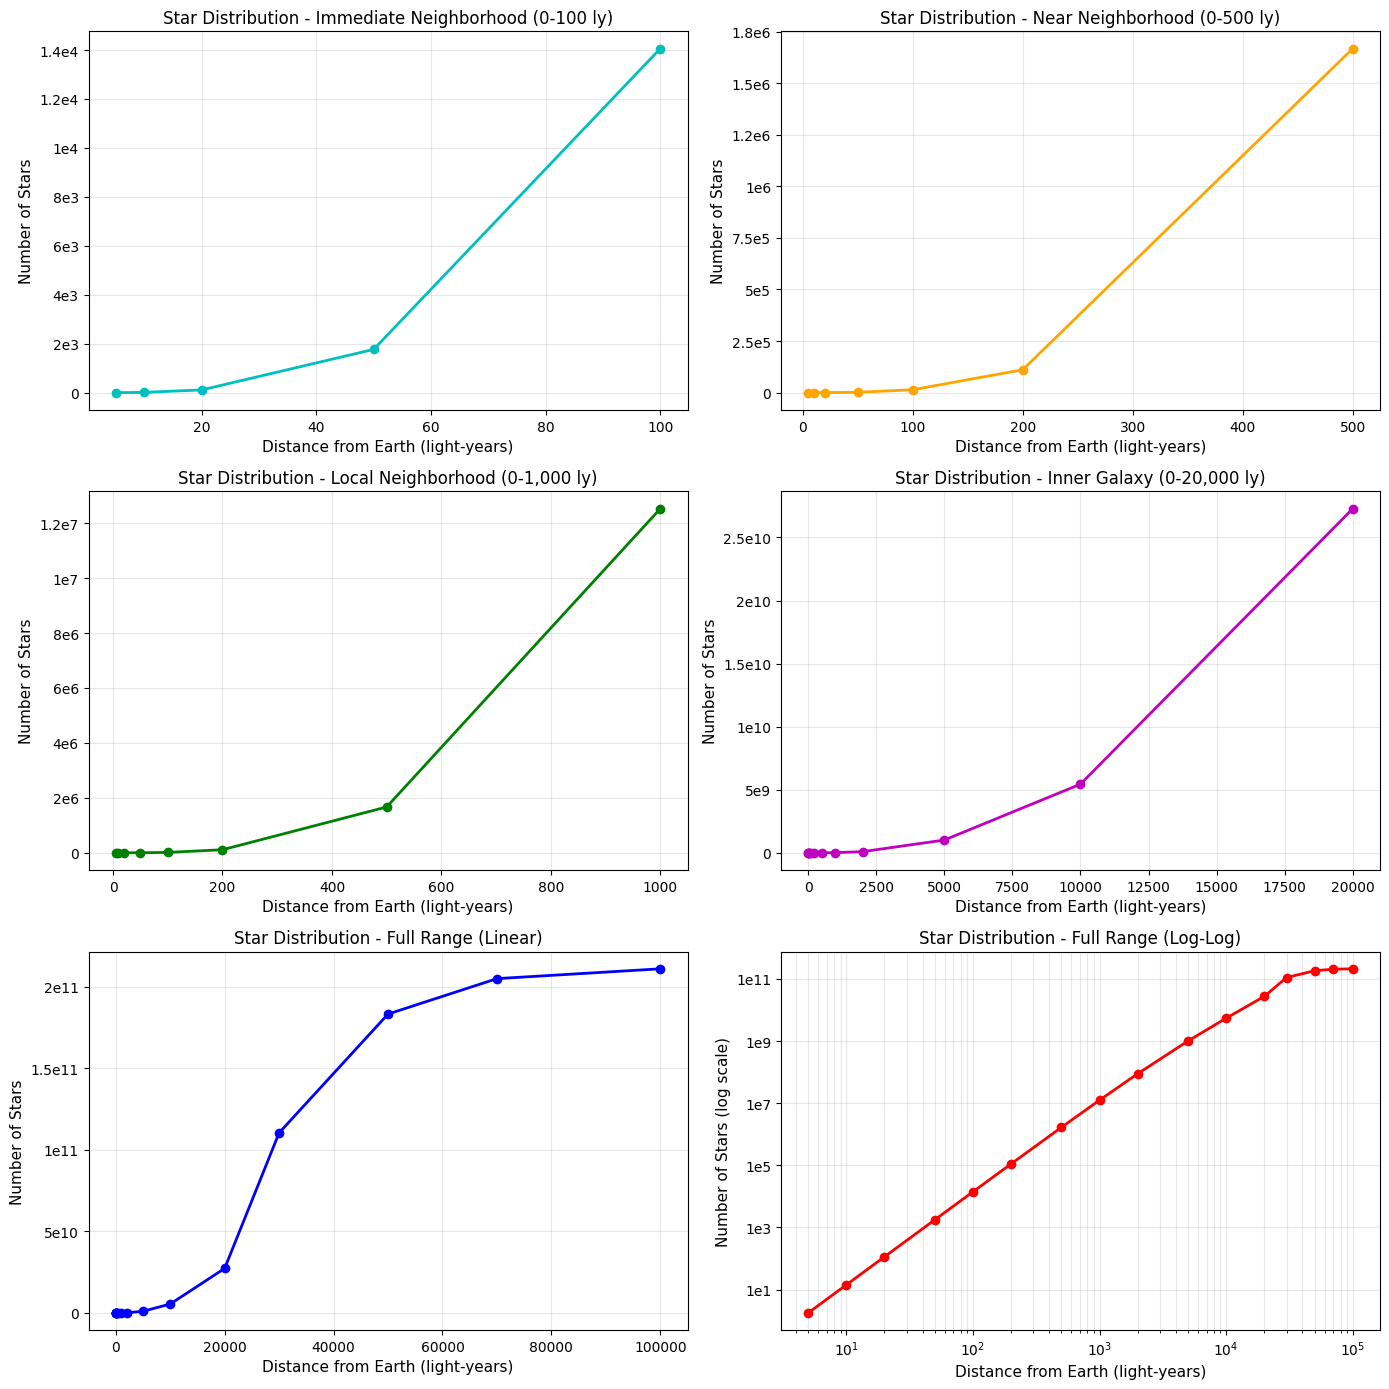


Summary of estimated stars within distance from Earth:
Distance (ly)   Stars                     % of Galaxy 
5               1.8                       0.00%
10              14.2                      0.00%
20              113.7                     0.00%
50              1.77 thousand             0.00%
100             14.06 thousand            0.00%
200             111.01 thousand           0.00%
500             1.67 million              0.00%
1,000           12.53 million             0.01%
2,000           88.54 million             0.04%
5,000           1.01 billion              0.48%
10,000          5.44 billion              2.57%
20,000          27.28 billion             12.88%
30,000          110.41 billion            52.11%
50,000          183.23 billion            86.48%
70,000          204.94 billion            96.73%
100,000         210.97 billion            99.57%


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from extra_lib import estimate_stars_in_sphere

# Generate data points for various distances from Earth
distances_ly = np.array(
    [
        5,
        10,
        20,
        50,
        100,
        200,
        500,
        1000,
        2000,
        5000,
        10000,
        20000,
        30000,
        50000,
        70000,
        100000,
    ]
)

# Calculate star counts for each distance
star_counts = []
fractions = []

for d in distances_ly:
    stars, frac = estimate_stars_in_sphere(d)
    star_counts.append(stars)
    fractions.append(frac)

star_counts = np.array(star_counts)
fractions = np.array(fractions)

# Formatter to show scientific notation directly on each tick (e.g., 2e3, 1e7)
def sci_notation_formatter(x, pos):
    if x == 0:
        return '0'
    exp = int(np.floor(np.log10(abs(x))))
    coef = x / 10**exp
    if coef == int(coef):
        return f'{int(coef)}e{exp}'
    return f'{coef:.1f}e{exp}'

# Create figure with six subplots (3x2)
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

# Plot 1: 0-100 light years (Linear) - Immediate neighborhood
ax1 = axes[0, 0]
mask_100 = distances_ly <= 100
ax1.plot(distances_ly[mask_100], star_counts[mask_100], "c-o", markersize=6, linewidth=2)
ax1.set_xlabel("Distance from Earth (light-years)", fontsize=11)
ax1.set_ylabel("Number of Stars", fontsize=11)
ax1.set_title("Star Distribution - Immediate Neighborhood (0-100 ly)", fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.yaxis.set_major_formatter(FuncFormatter(sci_notation_formatter))

# Plot 2: 0-500 light years (Linear) - Near neighborhood
ax2 = axes[0, 1]
mask_500 = distances_ly <= 500
ax2.plot(distances_ly[mask_500], star_counts[mask_500], "orange", marker="o", markersize=6, linewidth=2)
ax2.set_xlabel("Distance from Earth (light-years)", fontsize=11)
ax2.set_ylabel("Number of Stars", fontsize=11)
ax2.set_title("Star Distribution - Near Neighborhood (0-500 ly)", fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.yaxis.set_major_formatter(FuncFormatter(sci_notation_formatter))

# Plot 3: 0-1000 light years (Linear) - Local neighborhood
ax3 = axes[1, 0]
mask_1k = distances_ly <= 1000
ax3.plot(distances_ly[mask_1k], star_counts[mask_1k], "g-o", markersize=6, linewidth=2)
ax3.set_xlabel("Distance from Earth (light-years)", fontsize=11)
ax3.set_ylabel("Number of Stars", fontsize=11)
ax3.set_title("Star Distribution - Local Neighborhood (0-1,000 ly)", fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.yaxis.set_major_formatter(FuncFormatter(sci_notation_formatter))

# Plot 4: 0-20000 light years (Linear) - Inner galaxy
ax4 = axes[1, 1]
mask_20k = distances_ly <= 20000
ax4.plot(distances_ly[mask_20k], star_counts[mask_20k], "m-o", markersize=6, linewidth=2)
ax4.set_xlabel("Distance from Earth (light-years)", fontsize=11)
ax4.set_ylabel("Number of Stars", fontsize=11)
ax4.set_title("Star Distribution - Inner Galaxy (0-20,000 ly)", fontsize=12)
ax4.grid(True, alpha=0.3)
ax4.yaxis.set_major_formatter(FuncFormatter(sci_notation_formatter))

# Plot 5: Full range - Linear Y-axis
ax5 = axes[2, 0]
ax5.plot(distances_ly, star_counts, "b-o", markersize=6, linewidth=2)
ax5.set_xlabel("Distance from Earth (light-years)", fontsize=11)
ax5.set_ylabel("Number of Stars", fontsize=11)
ax5.set_title("Star Distribution - Full Range (Linear)", fontsize=12)
ax5.grid(True, alpha=0.3)
ax5.yaxis.set_major_formatter(FuncFormatter(sci_notation_formatter))

# Plot 6: Full range - Logarithmic Y-axis
ax6 = axes[2, 1]
ax6.plot(distances_ly, star_counts, "r-o", markersize=6, linewidth=2)
ax6.set_xlabel("Distance from Earth (light-years)", fontsize=11)
ax6.set_ylabel("Number of Stars (log scale)", fontsize=11)
ax6.set_title("Star Distribution - Full Range (Log-Log)", fontsize=12)
ax6.set_yscale("log")
ax6.set_xscale("log")
ax6.grid(True, alpha=0.3, which="both")
ax6.yaxis.set_major_formatter(FuncFormatter(sci_notation_formatter))

plt.tight_layout()
plt.show()

# Print summary table
print("\nSummary of estimated stars within distance from Earth:")
print(f"{'Distance (ly)':<15} {'Stars':<25} {'% of Galaxy':<12}")
print("=" * 52)
for d, s, f in zip(distances_ly, star_counts, fractions):
    if s >= 1e9:
        stars_str = f"{s / 1e9:.2f} billion"
    elif s >= 1e6:
        stars_str = f"{s / 1e6:.2f} million"
    elif s >= 1e3:
        stars_str = f"{s / 1e3:.2f} thousand"
    else:
        stars_str = f"{s:.1f}"
    print(f"{d:<15,} {stars_str:<25} {f * 100:.2f}%")